In [1]:
import pandas as pd
import utils_comp as utils
import pickle

In [2]:
# Dataset; 'iggin' or 'iggielgn'
dataset = 'iggielgn'

# S-t-flow; 's-t-degree' or 's-t-type'
s_t_flow = 'hybrid'

### Load data from 'N-k_CENTRALITY.ipynb' and 'N-k_MAX_FLOW.ipynb'

In [3]:
# centrality_random_node_removal_df = pd.read_pickle('results/centrality/'+dataset+'/random_node_removal.pkl')
centrality_greedy_node_removal_df = pd.read_pickle('results/centrality/'+dataset+'/greedy_node_removal.pkl')

# max_flow_random_node_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/random_node_removal_df.pkl')
max_flow_greedy_node_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/wfcr_node_removal_df.pkl')

# centrality_random_edge_removal_df = pd.read_pickle('results/centrality/'+dataset+'/random_edge_removal.pkl')
centrality_greedy_edge_removal_df = pd.read_pickle('results/centrality/'+dataset+'/greedy_edge_removal.pkl')

# max_flow_random_edge_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/random_edge_removal_df.pkl')
max_flow_greedy_edge_removal_df = pd.read_pickle('results/max_flow/'+dataset+'/'+s_t_flow+'/wfcr_edge_removal_df.pkl')

In [4]:
with open('graph_objects/G_simple_directed_iggielgn.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed' 

# Direct comparison of index 

### Node

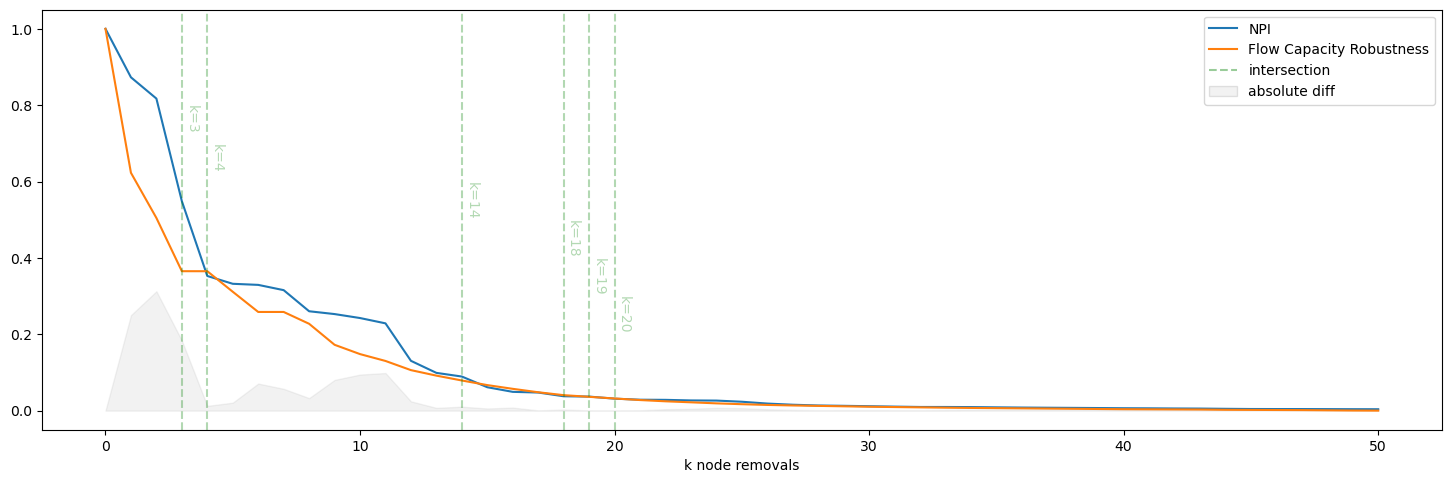

	AUC for NPI: 5.97  							          AUC for capacity_robustness_max_flow: 4.68
	NPI: [max ROC: 5.86689, avg ROC: 5.77667]    					  capacity_robustness_max_flow: [max ROC: 4.86271, avg ROC: 4.81028]



In [5]:
fig = utils.plot_max_flow_and_centrality_comparison([centrality_greedy_node_removal_df], [max_flow_greedy_node_removal_df], 'NPI', 'capacity_robustness_max_flow')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/direct_node_comparison.png')

In [6]:
# utils.common_entities(centrality_greedy_node_removal_df, max_flow_greedy_node_removal_df)

### Edge

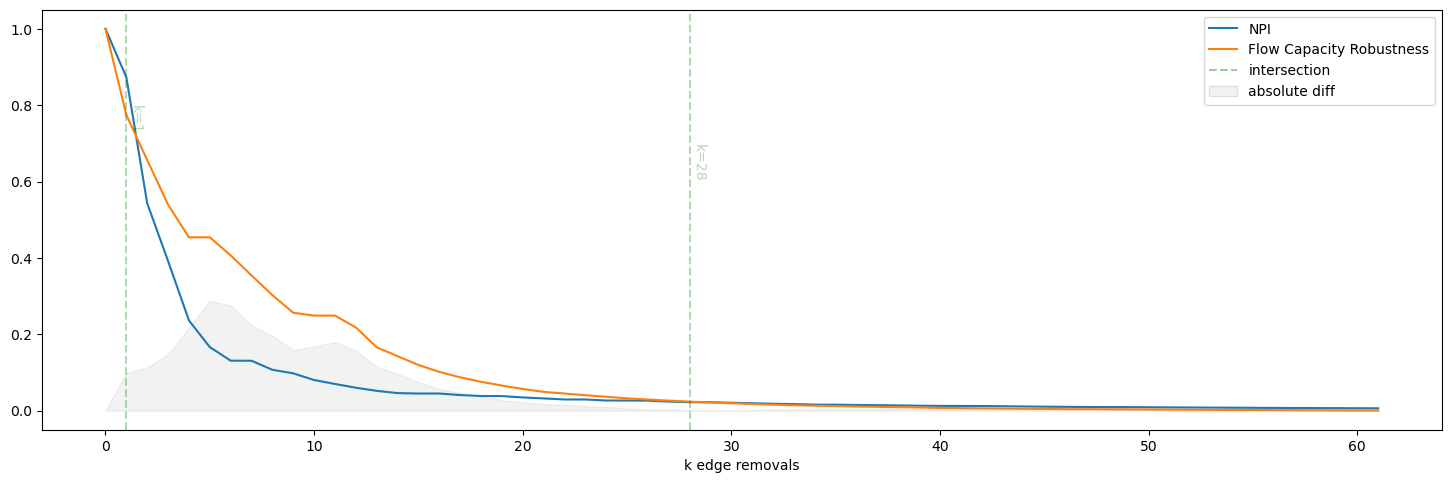

	AUC for NPI: 4.32  							          AUC for capacity_robustness_max_flow: 6.73
	NPI: [max ROC: 3.84550, avg ROC: 3.80328]    					  capacity_robustness_max_flow: [max ROC: 3.48989, avg ROC: 3.46153]



In [7]:
fig = utils.plot_max_flow_and_centrality_comparison([centrality_greedy_edge_removal_df], [max_flow_greedy_edge_removal_df], 'NPI', 'capacity_robustness_max_flow')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/direct_edge_comparison.png')

In [8]:
utils.common_entities(centrality_greedy_edge_removal_df, max_flow_greedy_edge_removal_df)

4 common entity removals
61 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 79.0
Variance of index differences for random (averaged) edge removal: 491858.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
2,"(SEQ_7053__M_LMGN, N_539_M_LMGN)",12,9,3
3,"(SEQ_369__L_LMGN, SEQ_373__L_LMGN)",10,2,8
0,"(N_183_L_LMGN, SEQ_10361__M_LMGN)",29,11,18
1,"(N_2_L_LMGN, SEQ_6095__M_LMGN)",53,27,26


# Transformation between 'domains'

In [9]:
centrality_greedily_removed_nodes_lst = centrality_greedy_node_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_nodes_lst = max_flow_greedy_node_removal_df['removed_entity'].dropna().tolist()

centrality_greedily_removed_edges_lst = centrality_greedy_edge_removal_df['removed_entity'].dropna().tolist()
max_flow_greedily_removed_edges_lst = max_flow_greedy_edge_removal_df['removed_entity'].dropna().tolist()
centrality_greedily_removed_edges_lst = utils.fix_centrality_edge([tuple(e) for e in centrality_greedily_removed_edges_lst])
max_flow_greedily_removed_edges_lst = list(set([tuple(e) for e in max_flow_greedily_removed_edges_lst]))

### Max flow based N-k analysis employing greedy entity removal order resulting from centrality analysis

In [10]:
# centrality_greedily_removed_nodes_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='node', greedy_centrality_lst=centrality_greedily_removed_nodes_lst)
# centrality_greedily_removed_nodes_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_nodes_max_flow_df.pkl')
centrality_greedily_removed_nodes_max_flow_df = pd.read_pickle('results/comparison/iggin/centrality_greedily_removed_nodes_max_flow_df.pkl')

In [11]:
# centrality_greedily_removed_edges_max_flow_df = utils_max_flow.flow_capacity_robustness(G_simple_directed, heuristic='greedy_centrality', remove='edge', greedy_centrality_lst=centrality_greedily_removed_edges_lst)
# centrality_greedily_removed_edges_max_flow_df.to_pickle('results/comparison/centrality_greedily_removed_edges_max_flow_df.pkl')
centrality_greedily_removed_edges_max_flow_df = pd.read_pickle('results/comparison/iggin/centrality_greedily_removed_edges_max_flow_df.pkl')

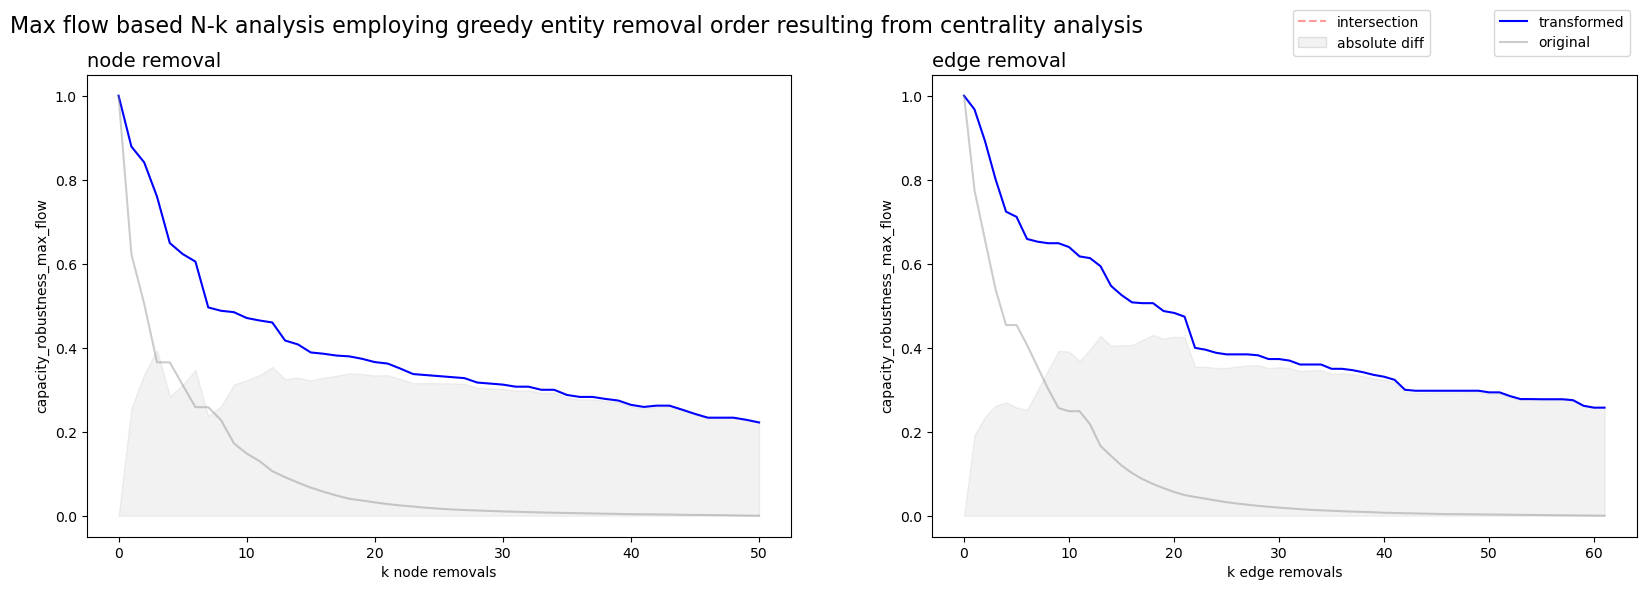

In [12]:
fig = utils.plot_transform_analysis([centrality_greedily_removed_nodes_max_flow_df, centrality_greedily_removed_edges_max_flow_df], [max_flow_greedy_node_removal_df, max_flow_greedy_edge_removal_df], 'capacity_robustness_max_flow')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/max_flow_employing_centrality_removal_order.png')

In [13]:
utils.common_entities(centrality_greedily_removed_nodes_max_flow_df, max_flow_greedy_node_removal_df)

0 common entity removals
50 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: nan


c:\Users\Oskar\anaconda3\envs\master_thesis\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Oskar\anaconda3\envs\master_thesis\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Oskar\anaconda3\envs\master_thesis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Variance of index differences for random (averaged) node removal: 9083.0


KeyError: 'diff'

In [ ]:
utils.common_entities(centrality_greedily_removed_edges_max_flow_df, max_flow_greedy_edge_removal_df)

15 common entity removals
110 greedy entity removals before 'wfcr' reached 0 (limiting metric)

Variance of index differences of common entities: 1471.0
Variance of index differences for random (averaged) edge removal: 9283.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
1,"(INET_N_1219, INET_N_870)",2,4,2
3,"(INET_N_1551, INET_N_72)",23,20,3
11,"(NO_N_4, NO_N_5)",4,1,3
2,"(INET_N_295, INET_N_992)",15,7,8
0,"(INET_N_1389, INET_N_1573)",19,10,9
13,"(INET_N_301, INET_N_1630)",24,34,10
7,"(INET_N_151, INET_N_1545)",16,3,13
10,"(INET_N_435, INET_N_889)",38,23,15
6,"(INET_N_416, INET_N_138)",30,49,19
4,"(NO_N_13, NO_N_12)",53,25,28


### Centrality based N-k analysis employing greedy entity removal order resulting from max flow analysis

In [ ]:
# max_flow_greedily_removed_nodes_centrality_df, _ = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='node', greedy_max_flow_lst=max_flow_greedily_removed_nodes_lst)
# max_flow_greedily_removed_nodes_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_nodes_centrality_df.pkl')
max_flow_greedily_removed_nodes_centrality_df = pd.read_pickle('results/comparison/iggin/max_flow_greedily_removed_nodes_centrality_df.pkl')

In [ ]:
# max_flow_greedily_removed_edges_centrality_df, _ = utils_centrality.n_minus_k(G_simple_directed, heuristic='max_flow', remove='edge', greedy_max_flow_lst=max_flow_greedily_removed_edges_lst)
# max_flow_greedily_removed_edges_centrality_df.to_pickle('results/comparison/max_flow_greedily_removed_edges_centrality_df.pkl')
max_flow_greedily_removed_edges_centrality_df = pd.read_pickle('results/comparison/iggin/max_flow_greedily_removed_edges_centrality_df.pkl')

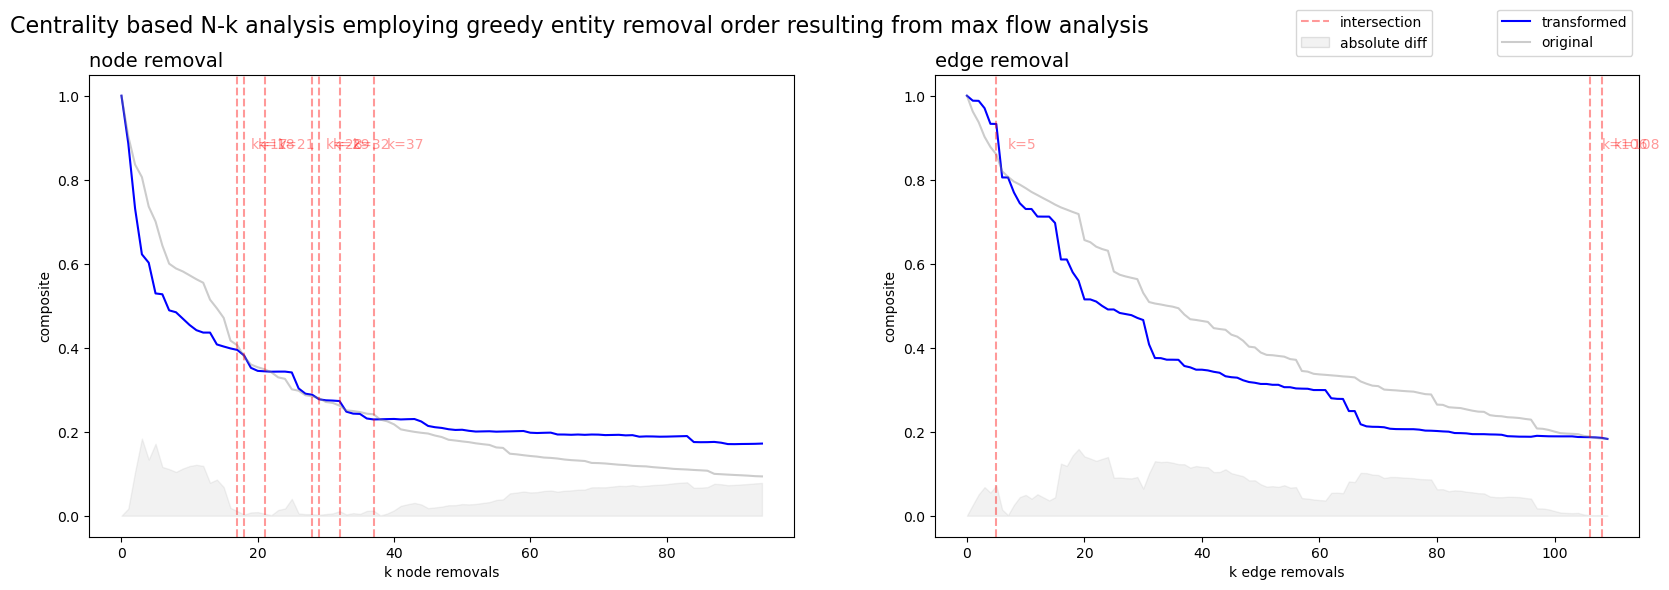

In [ ]:
fig = utils.plot_transform_analysis([max_flow_greedily_removed_nodes_centrality_df, max_flow_greedily_removed_edges_centrality_df], [centrality_greedy_node_removal_df, centrality_greedy_edge_removal_df], 'composite')
fig.savefig('saved_plots/'+dataset+'/'+s_t_flow+'/comparison/centrality_employing_max_flow_removal_order.png')

In [ ]:
utils.common_entities(max_flow_greedily_removed_nodes_centrality_df, centrality_greedy_node_removal_df)

20 common entity removals
400 greedy entity removals before 'greedy' reached 0 (limiting metric)

Variance of index differences of common entities: 916.0
Variance of index differences for random (averaged) node removal: 10207.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
17,INET_N_314,14,14,0
1,INET_N_72,8,9,1
12,INET_N_1219,3,4,1
0,INET_N_1545,2,5,3
7,INET_N_272,15,23,8
18,INET_N_999,71,62,9
8,N_kremenchuk,30,21,9
15,INET_N_966,17,30,13
9,INET_N_519,44,31,13
4,NO_N_32,33,16,17


In [ ]:
utils.common_entities(max_flow_greedily_removed_edges_centrality_df, centrality_greedy_edge_removal_df)

18 common entity removals
400 greedy entity removals before 'greedy' reached 0 (limiting metric)

Variance of index differences of common entities: 1764.0
Variance of index differences for random (averaged) edge removal: 9210.0


,removed_entity,k_iteration [centrality],k_iteration [max_flow],abs_diff
16,"(INET_N_394, INET_N_805)",108,108,0
8,"(INET_N_151, INET_N_1545)",20,15,5
7,"(INET_N_1113, INET_N_698)",3,9,6
13,"(NO_N_4, NO_N_5)",19,5,14
15,"(INET_N_301, INET_N_1630)",37,22,15
4,"(INET_N_1620, INET_N_1637)",16,1,15
11,"(INET_N_435, INET_N_889)",10,36,26
10,"(INET_N_577, INET_N_157)",57,83,26
0,"(INET_N_1389, INET_N_1573)",49,17,32
17,"(INET_N_1000, INET_N_279)",22,54,32
